In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.stats import zscore
from scipy.stats import boxcox

import sklearn
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor


from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv("Salaries.csv")

In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
df.shape

(397, 6)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


## About Columns:-

  1. Rank: Person holding the job title
  2. Discipline: Job Category
  3. Yrs.science.phd: Will determine the years since, they completed phd
  4. Yrs.Service: Service Served by the Person
  5. Sex: Gender of the person
  6. Salary: Present salary of that person

## Null Values

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
# No null Data
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<AxesSubplot:>

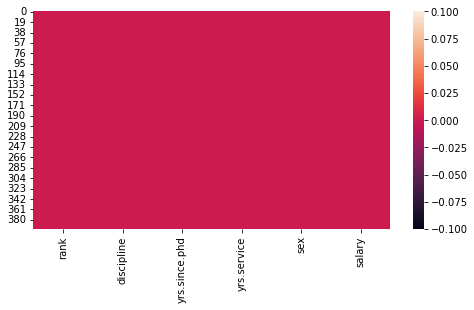

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())

# EDA

In [11]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

### Univariate Analysis

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

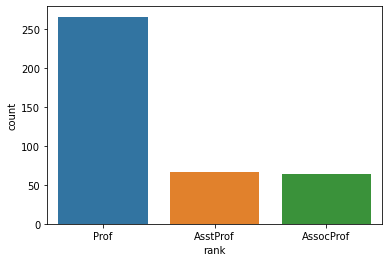

In [12]:
sns.countplot(x="rank",data=df)
df['rank'].value_counts()

From the above observed value "Rank column" are having 3 different ranks.

B    216
A    181
Name: discipline, dtype: int64

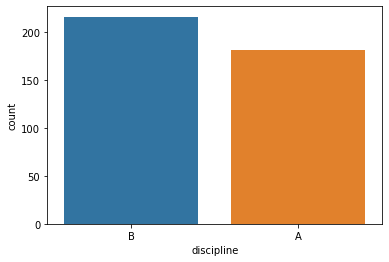

In [13]:
sns.countplot(x='discipline',data=df)
df['discipline'].value_counts()

In Discipline column, We found two job category

Male      358
Female     39
Name: sex, dtype: int64

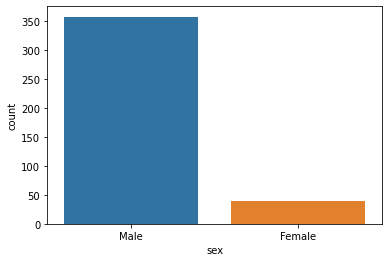

In [14]:
sns.countplot(x='sex',data=df)
df['sex'].value_counts()

Both "Male" and "Female" are involved in Jobs but Maximum are male 

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Count'>

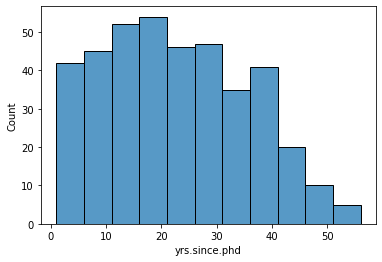

In [15]:
sns.histplot(x='yrs.since.phd',data=df)

maximum number of sex completed phd since year(10,20)yrs

### Bivariate Analysis

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Count'>

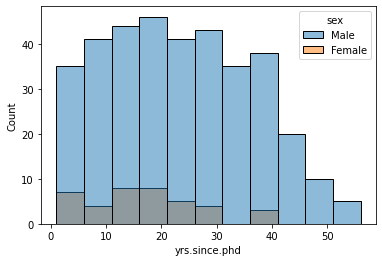

In [16]:
sns.histplot(x='yrs.since.phd',hue='sex',data=df)

Male are maximum in number as compared with Female, No females are working after 40 above whereas male are working 

<AxesSubplot:xlabel='yrs.service', ylabel='Count'>

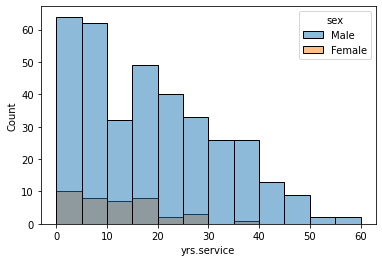

In [17]:
sns.histplot(x='yrs.service',hue='sex',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

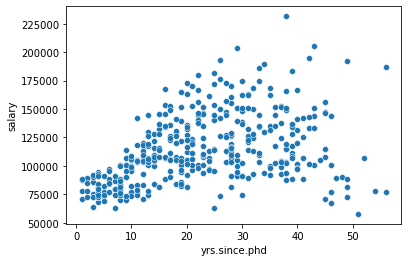

In [18]:
#bivariate analysis
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

maximum phd holders having salary above 75,000,few lies below even after 50 years

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

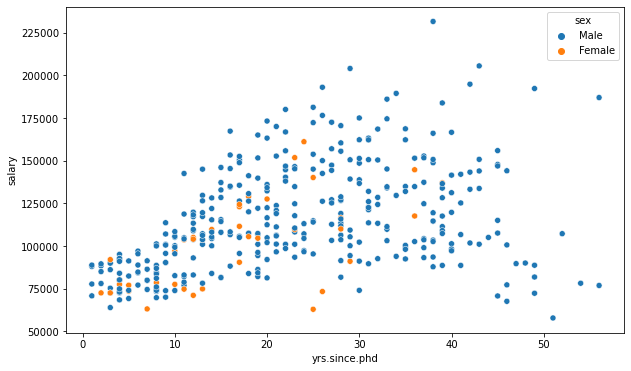

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yrs.since.phd',y='salary',hue='sex',data=df)

Data points are showing maximum salary above 200000 after phd is in mid of 30 years to 40 years after complition of PHD, Hight salary reported in mid of 35 to 40 years. 

### Depth Analysis of Nominal  and odinal data with target variable

<Figure size 720x432 with 0 Axes>

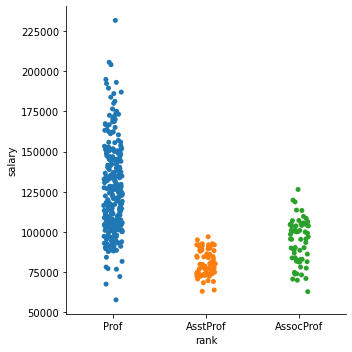

In [20]:
plt.figure(figsize=(10,6))
sns.catplot(x='rank',y='salary',data=df)

Salary of Prof is more followed by AssocProf and AsstProfrank 

<Figure size 720x432 with 0 Axes>

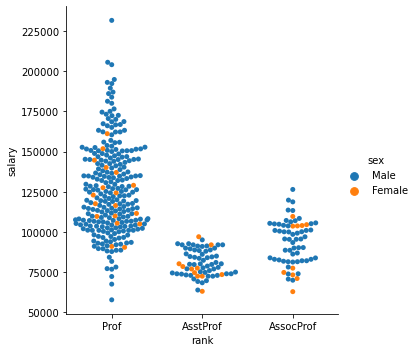

In [21]:
plt.figure(figsize=(10,6))
sns.catplot(x='rank',y='salary',hue='sex',kind='swarm',data=df)

Male with the highest salary as compare to Female.
Maximum salary recieved by male is above 225000
Maximum salary recieved by female is around 170000

<AxesSubplot:xlabel='rank', ylabel='count'>

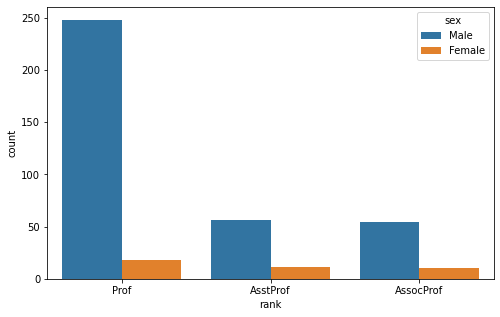

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='rank',hue='sex',data=df)

Maximum Female are working as Prof. Maximum male as Prof

<Figure size 576x360 with 0 Axes>

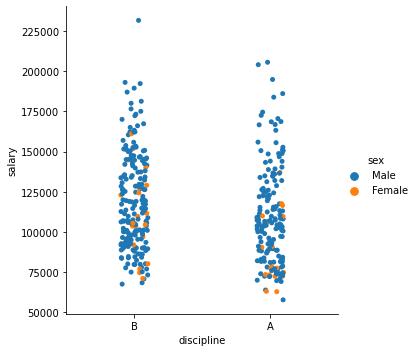

In [23]:
plt.figure(figsize=(8,5))
sns.catplot(x='discipline',y='salary',hue='sex',data=df)

Maximum salary is recieved by Female is at discipline 'B'

Maximum salary is recieved by Male is at discipline 'B' followed by discipline'A' 

<AxesSubplot:xlabel='discipline', ylabel='count'>

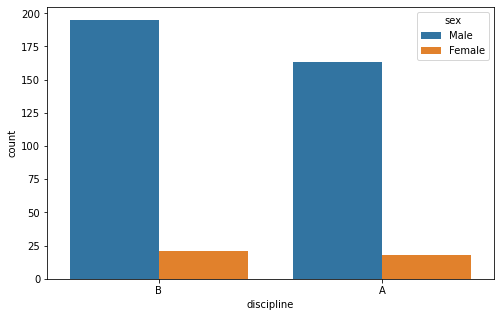

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='discipline',hue='sex',data=df)

Maximum Female is In discipline 'B'

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

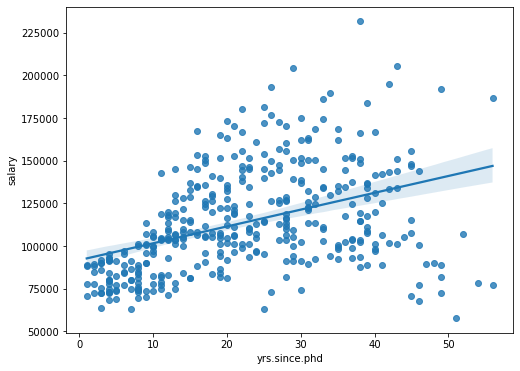

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(x='yrs.since.phd',y='salary',data=df)
# both data are int.

After 10 years of complition of phd, maximum candidates got their salary hike. and Year.Since.phd is positively related with Salary.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

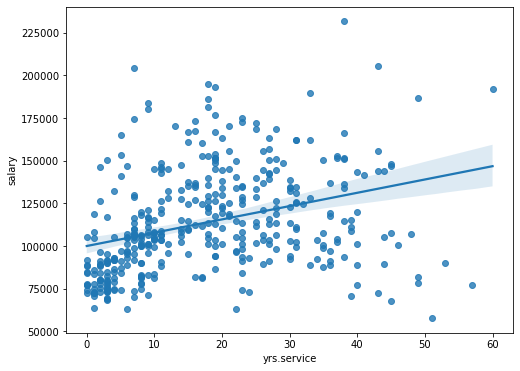

In [26]:
plt.figure(figsize=(8,6))
sns.regplot(x='yrs.service',y='salary',data=df)

Maximum salary at the time of joining lies at 75000 to 75000

In [27]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

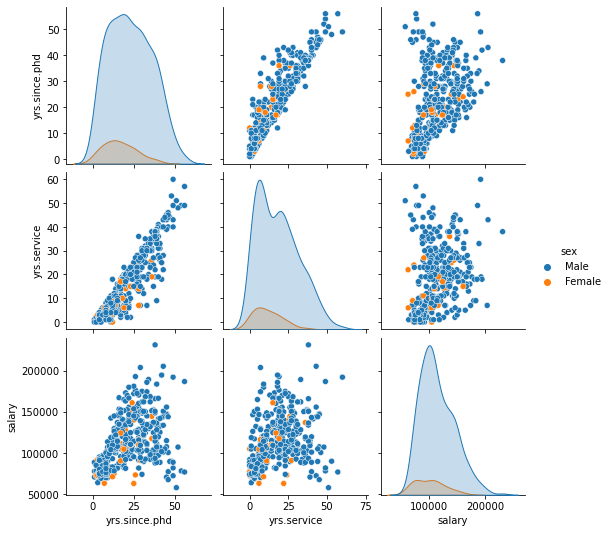

In [28]:
sns.pairplot(df,hue='sex')

## Encoding:

In [29]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

In [30]:
for i in df.columns:
    
    if df[i].dtypes == 'object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


Maximum with positivite correlation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


# Correlation:

In [33]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

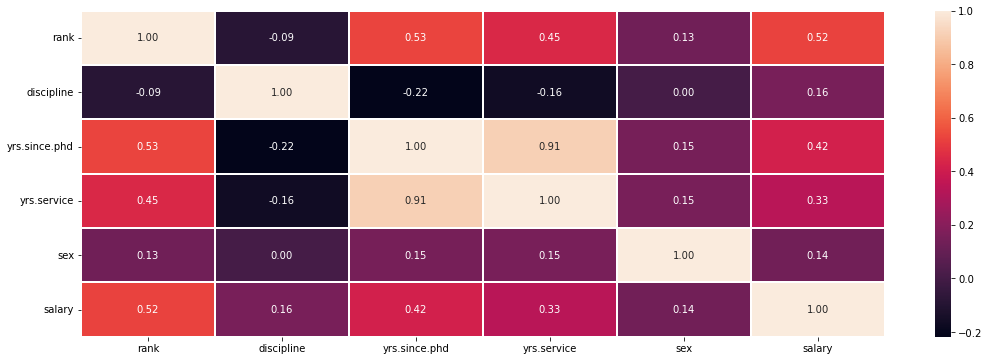

In [34]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,cmap="rocket",linewidth=0.2,fmt='0.2f')

### Outcome of corelation:

1. sex is 14 percent correlated with the target variable which is a week bond.
2. Years of service is 33 percent correlated with the target variable which is very good bond.
3. Years Since Phd is 42 percent correlted with the target variable which is strong bond.
4. discipline is 16 percent correlated with the target variable which is good bond.
5. rank is 52 percent correlated with the target variable, which is a strong bond
6. salary is Target Variable

Maximum correlation- 'Rank'

Week correlation- 'sex'

### Checking columns witch is positively and negatively correlated with target variable.

In [35]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Correlation')

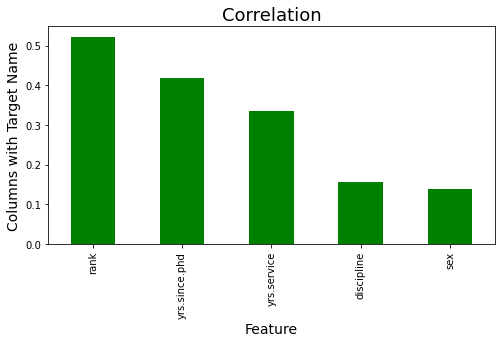

In [36]:
plt.figure(figsize=(8,4))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='g')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Columns with Target Name",fontsize=14)
plt.title("Correlation",fontsize=18)

'sex' has week correlated with Target Variable.

#### Less Correlated so No Multicolinearity..

## Satistical Summary(Descriptive Statistics)

In [37]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [38]:
# counts are intact means no missing value
# mean is greater than median at yrs.since.phd, yrs.service hence columns "Right Skewed Data"
# mean is greater than median at salary is right skewd but its a target variable
# median is greater than mean at rank,discipline,sex are 'Left skewed data' but category variable.

# spread in data is found
# Skwness is present

# huge outliers in years of service

<AxesSubplot:>

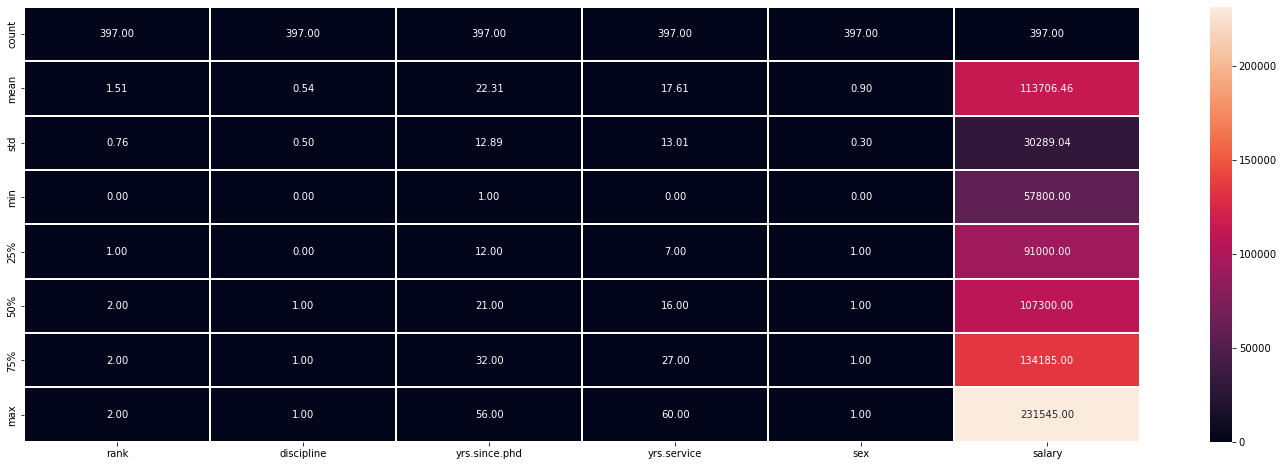

In [39]:
plt.figure(figsize=(25,8))
sns.heatmap(df.describe(),annot=True,cmap='rocket',linewidth=0.02,fmt='0.2f',linecolor='w')

## Checking Outliers:

In [40]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [41]:
df.info() # info of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


<AxesSubplot:xlabel='rank'>

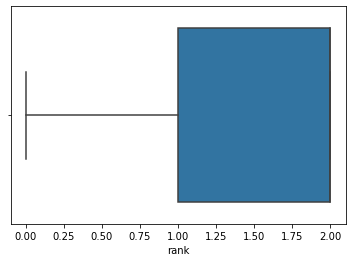

In [42]:
sns.boxplot(x='rank',data=df) 

<AxesSubplot:xlabel='discipline'>

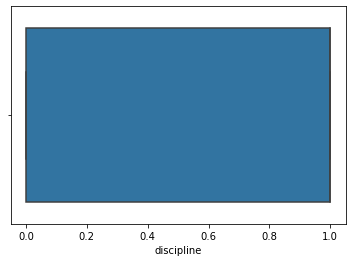

In [43]:
sns.boxplot(x='discipline',data=df)

<AxesSubplot:xlabel='yrs.since.phd'>

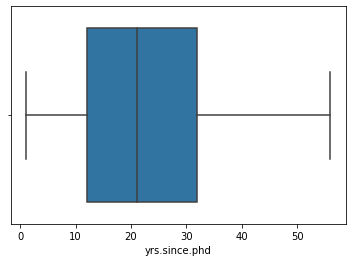

In [44]:
sns.boxplot(x='yrs.since.phd',data=df)

<AxesSubplot:xlabel='yrs.service'>

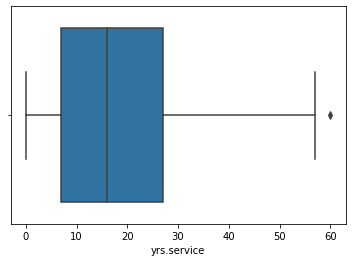

In [45]:
sns.boxplot(x='yrs.service',data=df)

<AxesSubplot:xlabel='sex'>

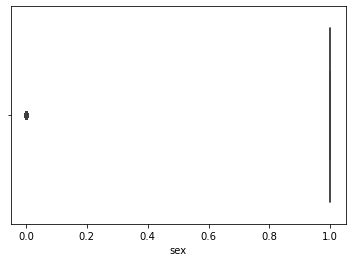

In [46]:
sns.boxplot(x='sex',data=df)

<AxesSubplot:xlabel='salary'>

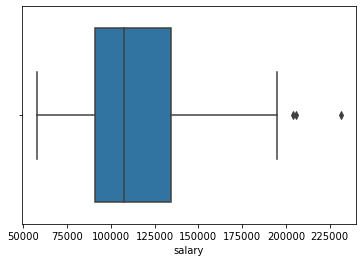

In [47]:
sns.boxplot(x='salary',data=df) # target variable

From all the above observation we found that:
    
   - Their is no outliers in Rank, discipline, yrs.since.phd columns.
   - Their is a outlier present in sex colum which is a category column.
   - Their is a outlier present present in salary column but that is target variable.
   - Their is a outlier in yrs.service which is a integer value.
  
    `Finally We found outlier on yrs.service column that needs to to treated.

# Skewness

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Observation:

The Outcome of the skewness. Skewness threshold is taken +/-68.
Column having outliers:
    1. Rank
    2. sex
    3. salary
    
    #rank,sex category variable contain sknewness, 
    #salary which is a target variable contain skwenss
     

<AxesSubplot:xlabel='rank', ylabel='Density'>

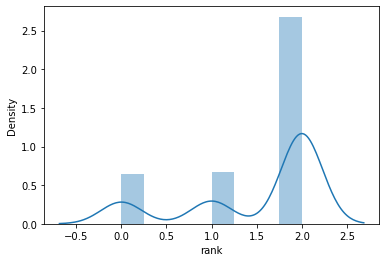

In [50]:
sns.distplot(df['rank'])

The data of this column is not normalised.The blocks is out of the normalised curve

This plot is Trimodal. Trimodal-three modes(Frequency)

<AxesSubplot:xlabel='discipline', ylabel='Density'>

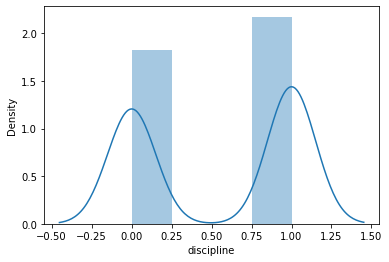

In [51]:
sns.distplot(df['discipline'])

The data of this column is not normalised. The blocks is out of the normalised curve. This plot is bimodal, Bimodel=Two Modes(frequency)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

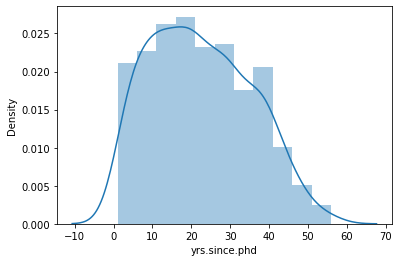

In [52]:
sns.distplot(df['yrs.since.phd'])

The data in this column is not normalised. The blocks is out of the normalised curve. 

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

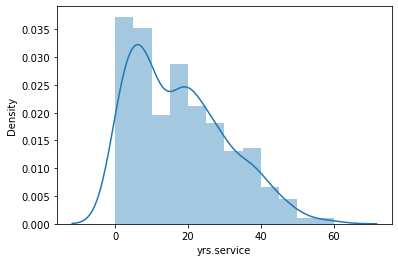

In [53]:
sns.distplot(df['yrs.service'])

The data in this column is not normalised, The blocks is out of the normal curve

<AxesSubplot:xlabel='sex', ylabel='Density'>

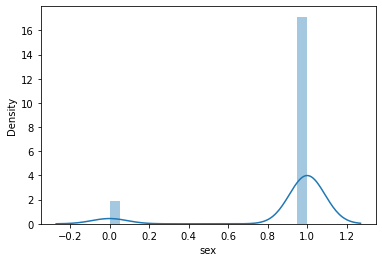

In [54]:
sns.distplot(df['sex'])

The data in the column is not nomalized, the blocks is out of the normal curve

<AxesSubplot:xlabel='salary', ylabel='Density'>

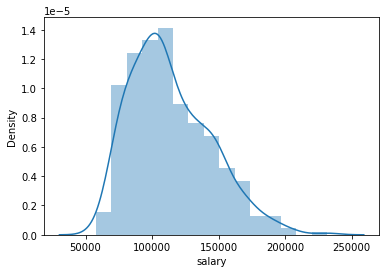

In [55]:
sns.distplot(df["salary"])

The data in the column is not normalised, the blocks is out of the normal curve

In [56]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

### We observed by seeing the Distribution, Data are skewed

1. Rank,Discipline,Sex is a category data

2. Yrs.since.phd, yrs.service is a int data

3. Salary is a Target variable


# DATA CLEANSING:

In [57]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [58]:
# sex is less cor-related with target variable.

In [59]:
delete=pd.DataFrame({"Correlation with target":0.138610,
                     "Column_Name":"sex",
                     "Normalised":"No",
                     "Outliers":"Yes"},index=[0])

In [60]:
delete

,Correlation with target,Column_Name,Normalised,Outliers
0,0.13861,sex,No,Yes


In [61]:
df.drop(['sex'],axis=1,inplace=True)

In [62]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,salary
310,2.0,0.0,20,7,92050


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   salary         397 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.6 KB


## Remove Outliers

In [64]:
z=np.abs(zscore(df))#making all columns postive

In [65]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [66]:
z.iloc[43,4]

3.8953773005457175

In [67]:
z.iloc[364,4]

3.034410248101501

In [68]:
df_new=df[(z<3).all(axis=1)]

In [69]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [70]:
print("Size of Old Data SET  ",df.shape)
print("\nSize of New Data SET  ",df_new.shape)

Size of Old Data SET   (397, 5)

Size of New Data SET   (393, 5)


In [71]:
print("DATA LOSS PERCENT---> ",((397-393)/397)*100)

DATA LOSS PERCENT--->  1.0075566750629723


In [72]:
#Data is divided into two parts

In [73]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

### Transforming data to Remove Skewness

In [74]:
x.skew() #checking screwness in df

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
dtype: float64

In [75]:
 # Power transform is not working:

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [76]:
print(x)

[[ 0.69481738  0.91457564 -0.11344983  0.26888583]
 [ 0.69481738  0.91457564 -0.03455335  0.1209006 ]
 [-1.0753989   0.91457564 -1.6242611  -1.28449532]
 ...
 [ 0.69481738 -1.09340328  1.42772852  0.72581897]
 [ 0.69481738 -1.09340328  0.33874878  0.04312953]
 [-1.0753989  -1.09340328 -1.12908354 -1.11979784]]


## Scaling Data

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

x=mms.fit_transform(x)

In [78]:
x

array([[1.        , 1.        , 0.46555325, 0.56141797],
       [1.        , 1.        , 0.48382448, 0.52515552],
       [0.26651065, 1.        , 0.11567236, 0.18077588],
       ...,
       [1.        , 0.        , 0.82246669, 0.67338533],
       [1.        , 0.        , 0.57027556, 0.50609842],
       [0.26651065, 0.        , 0.23034795, 0.22113351]])

In [79]:
x.mean()

0.5609970008331717

In [80]:
x.std()

0.3760167176420353

# Since the outcome is a continious value we will use Linear Regression.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [82]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    print(f"At random state {i},The Training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i},The Test accuracy is : {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,The Training accuracy is : 0.4187183174707221
At random state 0,The Test accuracy is : 0.42407580045887894


At random state 1,The Training accuracy is : 0.36126499815761526
At random state 1,The Test accuracy is : 0.556093199804601


At random state 2,The Training accuracy is : 0.4243180858341572
At random state 2,The Test accuracy is : 0.39017739488448244


At random state 3,The Training accuracy is : 0.41702274878989576
At random state 3,The Test accuracy is : 0.4370542665664737


At random state 4,The Training accuracy is : 0.45577811587730443
At random state 4,The Test accuracy is : 0.30160143552125995


At random state 5,The Training accuracy is : 0.4317058651085739
At random state 5,The Test accuracy is : 0.392667727969916


At random state 6,The Training accuracy is : 0.4550840504335585
At random state 6,The Test accuracy is : 0.3394911327106397


At random state 7,The Training accuracy is : 0.42662156068824153
At random state 7,The Test accuracy is : 0.383971

In [83]:
x # checking  x data

array([[1.        , 1.        , 0.46555325, 0.56141797],
       [1.        , 1.        , 0.48382448, 0.52515552],
       [0.26651065, 1.        , 0.11567236, 0.18077588],
       ...,
       [1.        , 0.        , 0.82246669, 0.67338533],
       [1.        , 0.        , 0.57027556, 0.50609842],
       [0.26651065, 0.        , 0.23034795, 0.22113351]])

In [84]:
y #checking y data

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.1)
lr.fit(x_train,y_train) #sent for training
pred_train=lr.predict(x_train) #predict train y
pred_test=lr.predict(x_test)# predict test y

In [86]:
#checking absolute error
print("Training Absolute_error ",mean_absolute_error(y_train,pred_train)," Test Absolute_error ",(mean_absolute_error(y_test,pred_test)),"\n")

#checking mean squared error
print("Training Mean_squared_error ",mean_squared_error(y_train,pred_train),"Test mean_squared_error ",(mean_squared_error(y_test,pred_test)),"\n")

#checking r2 score
print("Training R2_score",r2_score(y_train,pred_train),"Test R2_Score",r2_score(y_test,pred_test))

Training Absolute_error  17552.835805859453  Test Absolute_error  15808.341226018156 

Training Mean_squared_error  507072866.06417084 Test mean_squared_error  335828302.4303237 

Training R2_score 0.4136302714181924 Test R2_Score 0.49121442933842163


In [87]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

svc=SVR()
knn=KNeighborsRegressor()
gnb=GaussianNB()
dtc=DecisionTreeRegressor()
sgd=SGDRegressor()

models=[svc,knn,gnb,dtc,sgd]

## Cross Validation for Linear regression

In [88]:
from sklearn.model_selection import cross_val_score # import lib

In [89]:
Train_accuracy=r2_score(pred_train,y_train)
Test_accuracy=r2_score(pred_test,y_test)

from sklearn.model_selection import cross_val_score

for i in range(2,8):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {i} the cv score is{cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is0.3725726621126142 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207


At cross fold 3 the cv score is0.3614825257185709 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207


At cross fold 4 the cv score is0.37375824207620056 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207


At cross fold 5 the cv score is0.36138672712740993 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207


At cross fold 6 the cv score is0.3787726919349539 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207


At cross fold 7 the cv score is0.3719882470425055 and accuracy score for training is -0.41761802532332326 and accuracy for the testing is 0.18351545940480207




#### For classification problem- model with least difference between cross validation and accuracy is the best model. 

WE are selecting 3

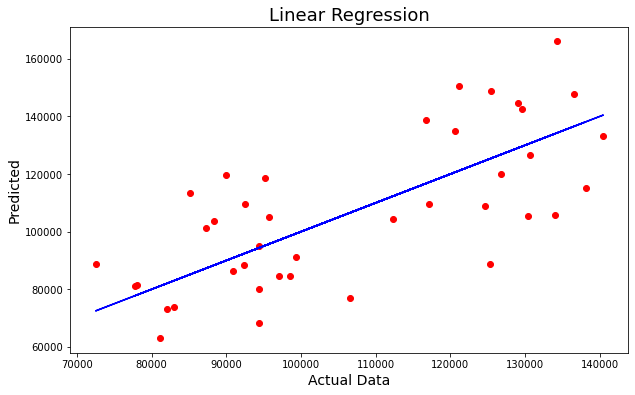

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.scatter(x=pred_test,y=y_test,color='r') #scatter test value and predict value
plt.plot(pred_test,pred_test,color='b')
plt.xlabel("Actual Data",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Regularization

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [92]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [93]:
# final training
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

ls_score_training*100

41.36297908398653

In [94]:
pred_ls=ls.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

0.49137918216654064

In [95]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.3727460457099773

# Ensemble Technique:

#### Using Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor() #instance

clf=GridSearchCV(rf,parameters)#instance with paraemters
clf.fit(x_train,y_train)#train

clf.best_params_

{'criterion': 'mae', 'max_features': 'sqrt'}

In [97]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print(rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print("Random Mean Score",rfc*100)

63.24230492967566
Random Mean Score 35.430533118996934


### AdaBoost REGRESSOR

In [98]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [99]:
Parameters={'loss':['linear','square','exponential'],
           'n_estimators':list(range(50,100))}

ad=AdaBoostRegressor()
clf=GridSearchCV(ad,Parameters)#instance with paraemters
clf.fit(x_train,y_train)#train
clf.best_params_

{'loss': 'linear', 'n_estimators': 52}

In [105]:
ad=AdaBoostRegressor(loss='linear',n_estimators=57)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred_decision=ad.predict(x_test)

ads=r2_score(y_test,pred_decision)
print("test score",ads)

adscore=cross_val_score(ad,x,y,cv=2)
ad_mean=adscore.mean()
print("AdaBoost Mean score ",ad_mean)

test score 0.6507645078312495
AdaBoost Mean score  0.4324530505956655


### Gradient Boosting Regressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [102]:
Parameters={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse','squared_error','mse'],
           'n_estimators':list(range(100,150))}

gbr=GradientBoostingRegresmin_samples_splitint or floatsor()
clf=GridSearchCV(gbr,Parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'friedman_mse', 'loss': 'absolute_error', 'n_estimators': 118}

In [106]:
gbr=GradientBoostingRegressor(criterion='friedman_mse', loss='absolute_error', n_estimators=118)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_decision)
print("test Score",gbrs)

gbrscore=cross_val_score(gbr,x,y,cv=2)
gbr_mean=gbrscore.mean()

print("gbr Mean",gbr_mean)

test Score 0.6693813666526833
gbr Mean 0.3501298176267985


In [108]:
#saving 
import pickle
filename='salary.pkl'
pickle.dump(gbr,open(filename,'wb'))

conclusion:

#opening up the pickle.

In [110]:
loaded_model =pickle.load(open('salary.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

66.93813666526833


In [115]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,89104.151462,122482.05805,122026.20602,75515.201913,129707.778292,119071.968638,82860.7974,104860.837476,120877.979293,110216.729939,...,122482.05805,132733.167377,73274.56739,74026.548246,86359.725144,104427.730653,82436.225018,119071.968638,88386.608511,103448.794961
Original,89104.151462,122482.05805,122026.20602,75515.201913,129707.778292,119071.968638,82860.7974,104860.837476,120877.979293,110216.729939,...,122482.05805,132733.167377,73274.56739,74026.548246,86359.725144,104427.730653,82436.225018,119071.968638,88386.608511,103448.794961
